# 44688-Data Analytics Capstone Project

## FDIP (Fire Department Incident Prediction)

##### 03/13/23 - 04/28/23

##### Debra D. "DeeDee" Walker

##### Northwest Missouri State University, Maryville MO 64468, USA

In [1]:
#Import the pandas framework to import and work with the dataset
import pandas as pd

#Import numpy
import numpy as np

#Import datetime so we can work with dates and times
import datetime as dt

#graphic imports
import matplotlib.pyplot as plt
%matplotlib inline

#import metrics and stats we may use
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

#Original data was accessed through the csv file download due to the limitations of the API on the site for this large dataset. The API endpoint limits hits and requires data to be requested by page
# Data was pulled from https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd on March 16, 2023 then cleaned for use.
#Use the function read_csv from pandas and create a dataframe assigned to variable df
df = pd.read_csv('fdip_clean.csv', sep=',')

#convert INCIDENT_DATE_TIME from object to datetime format
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], infer_datetime_format = True)

df.head(n=5)

,IM_INCIDENT_KEY,INCIDENT_DATE_TIME,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,BOROUGH_DESC,INCIDENT_CATEGORY,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Day_of_week,Hour_of_day,MONTH,DAY_NUM,INCIDENT_LENGTH,UNITS_CATEGORY
0,63583742,2018-07-21 12:18:19,1,0.66,10475,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,12,7,6,30min-45min,1
1,63583743,2018-07-21 12:18:26,1,0.12,11230,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,12,7,6,<=15min,1
2,63584267,2018-07-21 14:16:40,2,0.02,11204,4 - Brooklyn,HAZARDOUS CONDITION-NO FIRE,4,1,4,Saturday,14,7,6,<=15min,2
3,63584484,2018-07-21 15:07:51,1,0.37,11235,4 - Brooklyn,SERVICE CALL,5,1,4,Saturday,15,7,6,15min-30min,1
4,63584485,2018-07-21 15:08:36,1,0.32,11208,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,15,7,6,15min-30min,1


##### Level Catergory is being dropped from the predictions because it is too skewed to the level of one to gain valid information and we can gain enough
#####  information from incident category, incident length, and units catergory

#### Import sklearn classifiers, pipelines, etc. for models

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Split Data and extract features with single y, incident category

In [3]:
from sklearn.model_selection import train_test_split

Xfeatures = df[['ZIP_CODE','BOROUGH_NUM','MONTH','Hour_of_day','DAY_NUM']]
ylabel = df[['INCIDENT_CATEGORY']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)
print('Train size: ', len(Xtrain), len(ytrain), 'Test size: ', len(Xtest), len(ytest))

Train size:  1872331 1872331 Test size:  468083 468083


#### Random Forest with one target

In [4]:
forest = RandomForestClassifier(random_state=50, max_depth=6)
forest.fit(Xtrain,ytrain.values.ravel())
y_pred = forest.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", forest.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", forest.score(Xtrain,ytrain))

Predicted y: ['RESCUE & EMS' 'RESCUE & EMS' 'RESCUE & EMS' ... 'RESCUE & EMS'
 'RESCUE & EMS' 'RESCUE & EMS']

Predicted probabilities: [[7.46755184e-02 1.45133085e-01 7.44992014e-02 ... 5.04652065e-01
  1.08171309e-01 1.90378311e-04]
 [7.49288513e-02 1.49601942e-01 7.51066994e-02 ... 5.10025674e-01
  9.38335868e-02 2.20612037e-04]
 [7.99319510e-02 1.32734845e-01 8.65142016e-02 ... 4.88052641e-01
  1.08306071e-01 3.92011471e-04]
 ...
 [5.88627105e-02 1.93682580e-01 6.41083245e-02 ... 5.49007001e-01
  6.38361123e-02 1.88244162e-04]
 [7.47025701e-02 1.46160315e-01 7.90306671e-02 ... 5.17219042e-01
  9.22862831e-02 1.49119335e-04]
 [8.40275022e-02 1.36774438e-01 8.37151418e-02 ... 4.80295737e-01
  1.09656609e-01 2.83628793e-04]]

The mean accuracy on the given test data and labels: 0.4948580138875017


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.         0.42665037 0.         0.         0.         0.49530795
 0.         0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.1152447895407705


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.3148562904871879
Recall is  [0.         0.01701471 0.         0.         0.         0.995817
 0.         0.        ]
Recall as macro is  0.1266039632034768
Recall as weighted is  0.4948580138875017
F1 is  [0.         0.03272437 0.         0.         0.         0.66156237
 0.         0.        ]
F1 as macro is  0.08678584279145551
F1 as weighted is  0.3322746418539457


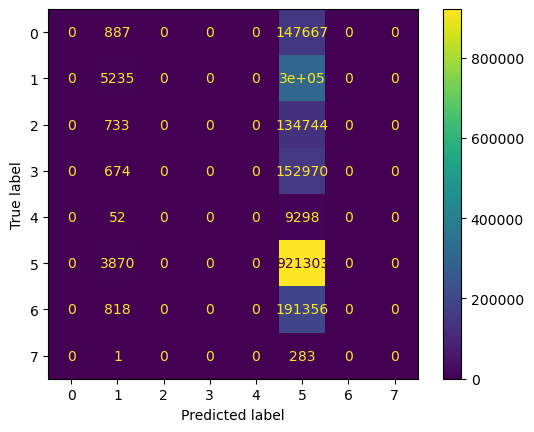

In [5]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))

###### Feature Importance

<AxesSubplot: >

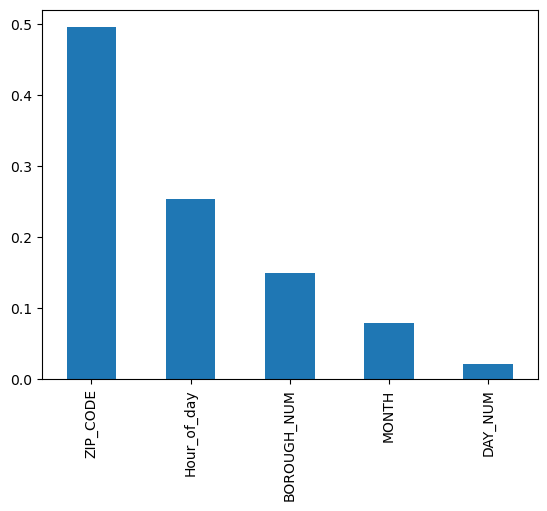

In [6]:
feature_importances = pd.Series(forest.feature_importances_, index=Xtrain.columns).sort_values(ascending=False)
feature_importances.plot.bar()

##### Change features based on feature importance

In [11]:
Xfeatures = df[['ZIP_CODE','Hour_of_day']]
ylabel = df[['INCIDENT_CATEGORY']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)

##### Fit the model again with revised features and revised hyperparameter tuning

In [12]:
forest = RandomForestClassifier(random_state=50, max_depth=10, n_estimators=150)
forest.fit(Xtrain,ytrain.values.ravel())
y_pred = forest.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", forest.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", forest.score(Xtrain,ytrain))

Predicted y: ['RESCUE & EMS' 'RESCUE & EMS' 'RESCUE & EMS' ... 'RESCUE & EMS'
 'RESCUE & EMS' 'RESCUE & EMS']

Predicted probabilities: [[7.30496025e-02 1.43471275e-01 7.06577418e-02 ... 4.99870724e-01
  1.20828737e-01 3.01656225e-04]
 [7.63722857e-02 1.43267600e-01 8.15907643e-02 ... 5.05577871e-01
  9.78453457e-02 2.07935274e-04]
 [7.17530744e-02 1.35632077e-01 9.27162021e-02 ... 5.16116217e-01
  8.90078367e-02 4.59810348e-04]
 ...
 [5.23699304e-02 1.83400873e-01 6.48751482e-02 ... 5.88357519e-01
  5.55640117e-02 1.03215543e-05]
 [7.91361148e-02 1.32480032e-01 8.70528750e-02 ... 5.02779383e-01
  9.97631019e-02 1.88760550e-04]
 [7.41266739e-02 1.49872336e-01 7.63349221e-02 ... 5.01674596e-01
  1.03969970e-01 1.12485944e-04]]

The mean accuracy on the given test data and labels: 0.49538409608130185


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.         0.41791825 0.         0.         0.         0.49650757
 0.         0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.11430322850793301


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.31401413548592394
Recall is  [0.         0.03635655 0.         0.         0.         0.99044935
 0.         0.        ]
Recall as macro is  0.12835073735652408
Recall as weighted is  0.49538409608130185
F1 is  [0.         0.06689371 0.         0.         0.         0.66143894
 0.         0.        ]
F1 as macro is  0.09104158126544384
F1 as weighted is  0.3378286047820347


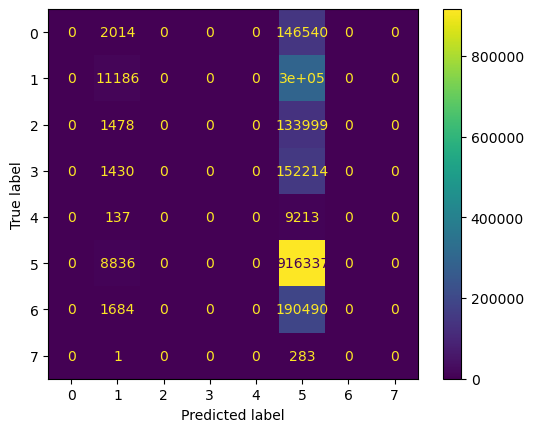

In [13]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))

#### Fit again with y label 2

In [14]:
ylabel = df[['UNITS_CATEGORY']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)
forest = RandomForestClassifier(random_state=50, max_depth=10, n_estimators=150)
forest.fit(Xtrain,ytrain.values.ravel())
y_pred = forest.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", forest.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", forest.score(Xtrain,ytrain))

Predicted y: ['1' '1' '1' ... '1' '1' '1']

Predicted probabilities: [[0.5956797  0.22126244 0.06763417 ... 0.0327582  0.02917437 0.0152981 ]
 [0.61620087 0.1673671  0.08372277 ... 0.0392458  0.04087447 0.00934377]
 [0.63097608 0.21357485 0.05755712 ... 0.03477066 0.02485203 0.009178  ]
 ...
 [0.70365554 0.15088934 0.04426789 ... 0.03172571 0.03521028 0.00580496]
 [0.61586352 0.1614513  0.08004956 ... 0.04312771 0.04489823 0.0100784 ]
 [0.60997451 0.17233544 0.08929715 ... 0.03933687 0.03592713 0.00875407]]

The mean accuracy on the given test data and labels: 0.6163974211824725


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.61639722 0.         0.         0.         0.         1.
 0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.23091388804324023


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.4242088663477284
Recall is  [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.20662194e-05 0.00000000e+00]
Recall as macro is  0.14285886660277317
Recall as weighted is  0.6163974211824725
F1 is  [7.62680373e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.41321476e-05 0.00000000e+00]
F1 as macro is  0.1089577865167851
F1 as weighted is  0.47011487622490583


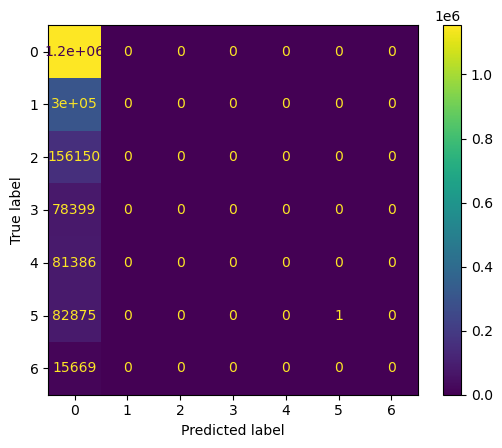

In [15]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))

#### Fit again with y label 3

In [16]:
ylabel = df[['INCIDENT_LENGTH']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)
forest = RandomForestClassifier(random_state=50, max_depth=10, n_estimators=150)
forest.fit(Xtrain,ytrain.values.ravel())
y_pred = forest.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", forest.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", forest.score(Xtrain,ytrain))

Predicted y: ['<=15min' '<=15min' '<=15min' ... '<=15min' '<=15min' '<=15min']

Predicted probabilities: [[0.02898557 0.39636114 0.00746528 ... 0.00304906 0.02670763 0.45520458]
 [0.02266971 0.39307359 0.0029825  ... 0.00216539 0.02152703 0.49767855]
 [0.03106972 0.39854158 0.00368206 ... 0.00169739 0.02203431 0.47941899]
 ...
 [0.0387392  0.42349943 0.00668721 ... 0.00187048 0.02974354 0.43389611]
 [0.0262078  0.39656798 0.00292425 ... 0.00189955 0.02980696 0.45831845]
 [0.02629225 0.39056663 0.00288058 ... 0.00232421 0.02571097 0.47955382]]

The mean accuracy on the given test data and labels: 0.46280331843034167


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.         0.43574755 0.         0.         0.         0.
 0.49777694]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.13336064116361018


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.3737723993281538
Recall is  [0.         0.59718236 0.         0.         0.         0.
 0.55565534]
Recall as macro is  0.16469109899327947
Recall as weighted is  0.46280331843034167
F1 is  [0.         0.50384977 0.         0.         0.         0.
 0.52512614]
F1 as macro is  0.14699655877939205
F1 as weighted is  0.41247661108968964


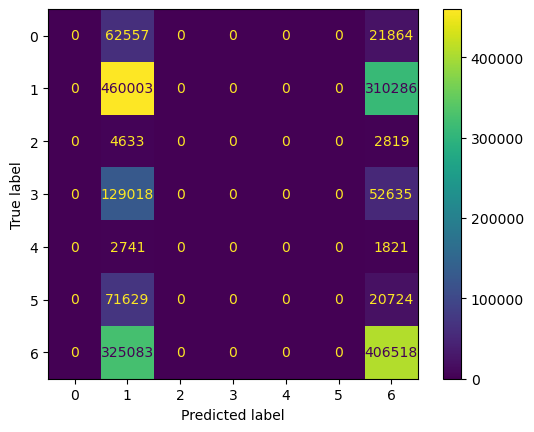

In [17]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))

In [9]:
##### Hyperparameter Tuning for Random Forest
'Ran for several hours and never completed'

grid_search = GridSearchCV(
    forest,
    param_grid = {'n_estimators': [int(x) for x in np.linspace(200, 500, num = 50)],
               'max_depth': [int(x) for x in np.linspace(10, 50, num = 10)],}, n_jobs=-1)

grid_search.fit(Xtrain, ytrain.values.ravel())

print(grid_search.best_params_)

cv_res = pd.DataFrame(grid_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()